In [1]:
%load_ext google.colab.data_table

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Markdown as md

In [78]:
gini = pd.read_csv('https://raw.githubusercontent.com/BRT33/Assignment---Income-inequality-in-relation-to-GDP/main/pip_dataset.csv',
                      usecols=['country', 'year', 'gini'], parse_dates=['year']).dropna()
gdp = pd.read_csv('https://raw.githubusercontent.com/BRT33/Assignment---Income-inequality-in-relation-to-GDP/main/gdp-per-capita-maddison-2020.csv',
                      usecols=['Entity', 'Year', 'GDP per capita'])

gdp = gdp.loc[gdp['Year'] >= 1967]
gdp['Year'] = pd.to_datetime(gdp['Year'], format='%Y')
gdp.columns = ['country', 'year', 'gdp']

merged = pd.merge(gdp, gini, on=["country", "year"])
merged.set_index('year', inplace=True)

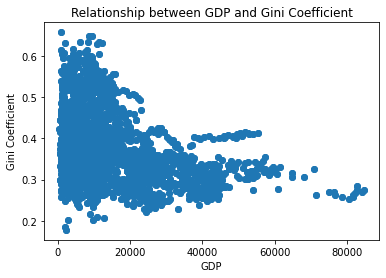

In [79]:
plt.scatter(merged["gdp"], merged["gini"])
plt.xlabel("GDP")
plt.ylabel("Gini Coefficient")
plt.title("Relationship between GDP and Gini Coefficient")
plt.show()

In [80]:
coeff = np.corrcoef(merged["gdp"], merged["gini"])[0, 1]

In [81]:
md(f'### de correlatie coefficient is {round(coeff, 4)}')

### de correlatie coefficient is -0.398

In [82]:
yearly = merged.resample('AS').mean()
yearly_coeff = yearly["gdp"].corr(yearly["gini"])

In [83]:
md(f'### Met gemmideldes over het jaar is de correlatie coefficient is {round(yearly_coeff, 4)}')


### Met gemmideldes over het jaar is de correlatie coefficient is -0.3926

# Inkomstongelijkheid in relatie to de Gini coëfficient

Als we naar de correlatie coëfficient kijken, zien we een middelmatige en negatieve  
correlatie tussen gdp en ongelijkheid in inkomsten(uitgedrukt als een hoge gini coëfficient).  
Ook als we gemmideldes nemen over het hele jaar, en op die manier de natuurlijke  
ruis uit de data halen zien we eenzelfde correlatie.


Hoe lager de gdp hoe meer ongelijkheid in inkomen lijkt dus de conclusie.  
Helemaal waar is dit ook weer niet, als we naar de scatterplot  
"Relationship between GDP and Gini Coefficient"kijken zien we dat de laagste waardes  
voor de gini coëfficient ook in het laagste segment van het gdp vallen.

Alhoewel er dus maar een matige (negatieve) correlatie bestaat is deze zeker aanwezig.